### Q1. What is Logistic Regression, and how does it differ from Linear Regression ?
#### Sol. Logistic Regression is a supervised machine learning algorithm primarily used for classification tasks, where the target variable is categorical (usually binary, such as 0/1 or Yes/No), while Linear Regression is used for predicting continuous numerical values.

#### Key Differences
##### 1. Purpose & Output
   * Linear Regression: Predicts a continuous outcome (e.g., price, age, temperature).
   * Logistic Regression: Predicts the probability of a binary outcome; the output is constrained between 0 and 1, representing the probability of the positive class, and is often converted to a categorical value using a threshold (e.g., if probability > 0.5, classify as 1/Yes).

##### 2. Estimation Method
  * Linear Regression: Uses least squares estimation to minimize errors between predictions and actual values.
  * Logistic Regression: Uses maximum likelihood estimation to find parameters that maximize the probability of observed categories.

##### 3. Distribution Assumptions
  * Linear Regression: Assumes the errors are normally distributed (Gaussian distribution).

  * Logistic Regression: Assumes the dependent variable follows a binomial distribution.

##### 4. Application Examples
  * Linear Regression: Predicting house prices, sales volume, or temperature.

  * Logistic Regression: Predicting loan default (yes/no), disease presence (yes/no), email spam detection (spam/not spam).

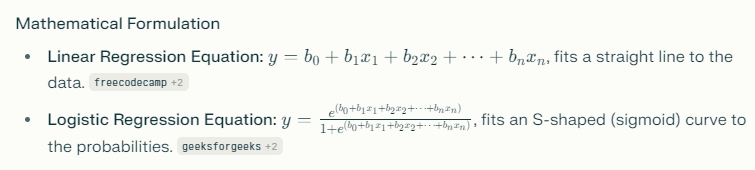

### Q2. Explain the role of the Sigmoid function in Logistic Regression.
#### Sol. The Sigmoid function in Logistic Regression is used to transform the output of a linear equation (which can range from negative to positive infinity) into a value between 0 and 1, thereby enabling interpretation as a probability suitable for binary classification tasks.

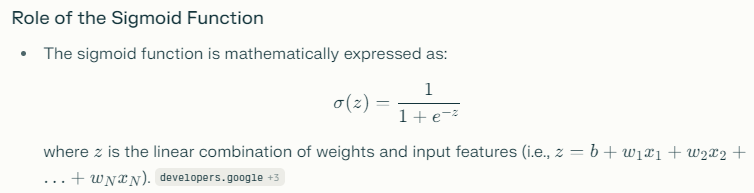

* After computing the raw (linear) score z, the sigmoid function converts it into a probability:
  * For large positive z, the output approaches 1 (indicating strong confidence for the positive class).
  *  For large negative z, the output approaches 0 (indicating strong confidence for the negative class).
  *  For z=0, output is 0.5, indicating total uncertainty.

##### Why the Sigmoid?
* It ensures the model's outputs are always between 0 and 1, which is essential for probability interpretation in classification.

*  It creates an "S-shaped" curve that smoothly transitions between the two classes, enabling effective thresholding (e.g., classify as 1 if output ≥ 0.5, else 0).

* The function is differentiable, supporting model training via optimization techniques such as gradient descent.

##### Summary
In Logistic Regression, the sigmoid function's main role is to map any real-valued prediction into a probability, making it possible to perform binary classification with meaningful probabilistic interpretation.

### Q3. What is Regularization in Logistic Regression and why is it needed ?
#### Sol. Regularization in Logistic Regression is a technique used to reduce overfitting by adding a penalty for complex models, usually through limiting the magnitude of model coefficients during training.

##### What Is Regularization?
* Regularization modifies the loss function by adding a penalty term for large parameter values (weights), discouraging the model from fitting the noise in the training data.

* Common types include:
  * L1 Regularization (Lasso): Penalizes the sum of the absolute values of coefficients, encouraging sparsity (some coefficients go to zero).

  * L2 Regularization (Ridge): Penalizes the sum of the squared values of coefficients, shrinking all coefficients but not necessarily forcing them to zero.

##### Why Is Regularization Needed?
* Overfitting occurs when a logistic regression model learns training data patterns too well, including noise and outliers, leading to poor performance on unseen (test) data.

* By penalizing high coefficients, regularization helps the model generalize better, improving predictive accuracy and robustness on new datasets—even if it means slightly less accuracy on training data (bias-variance tradeoff).

* Regularization is especially crucial in high-dimensional datasets or when many features are weakly informative.

##### Summary
Regularization is an essential aspect of logistic regression because it actively prevents overfitting, ensuring the model performs well on future, unseen data by constraining model complexity and favoring simpler, more general solutions

### Q4. What are some common evaluation metrics for classification models, and why are they important?
#### Sol. Common evaluation metrics for classification models include Accuracy, Precision, Recall, F1 Score, ROC Curve & AUC, Log Loss, and Confusion Matrix. These metrics are important because they help measure and compare a model's effectiveness, guide model selection, and expose strengths and weaknesses that may be hidden by relying on a single metric.

##### Main Classification Metrics
* Accuracy: Measures the proportion of total correct predictions out of all predictions. While easy to interpret, it can be misleading for imbalanced datasets.

* Precision: Indicates how many predicted positives are truly positive (Precision = TP/TP+FP). Useful when the cost of false positives is high.

* Recall (Sensitivity): Captures how many actual positives are correctly predicted (Recall = TP/TP+FN). Important in cases where missing a positive (false negative) is costly.

* F1 Score: Harmonic mean of Precision and Recall (F1=2*(Precision×Recall)/(Precision+Recall). Balances precision and recall, especially important with imbalanced classes.

* Confusion Matrix: Tabulates true positives, false positives, true negatives, and false negatives, offering a complete picture of classification results.

* ROC Curve & AUC: ROC curve plots true positive rate vs. false positive rate; AUC (Area Under the Curve) gives a single value to summarize overall model discrimination between classes.

* Log Loss: Measures the penalty for incorrect probabilistic predictions; lower values indicate better calibrated probabilities.

##### Why These Metrics Matter
* Metrics ensure fair, meaningful model evaluation by quantifying different facets of performance (e.g., error types, probability calibration).

* They support model selection and improvement by highlighting which models work best for specific problems, especially those involving class imbalance or different error costs.

* Using multiple metrics gives a robust, nuanced view of the model, which is critical for making real-world decisions in sensitive domains like healthcare, fraud detection, or spam filtering.

### Q5. Write a Python program that loads a CSV file into a Pandas DataFrame, splits into train/test sets, trains a Logistic Regression model, and prints its accuracy. (Use Dataset from sklearn package)
#### Sol.  

In [7]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset from sklearn
data = load_breast_cancer()

# Convert to Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=5000)  # increased max_iter to avoid convergence warning
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")


Logistic Regression Model Accuracy: 0.9561


### Q6. Write a Python program to train a Logistic Regression model using L2 regularization (Ridge) and print the model coefficients and accuracy. (Use Dataset from sklearn package)
#### Sol.

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Load dataset (Iris dataset)
data = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression with L2 regularization
model = LogisticRegression(
    penalty='l2',        # L2 regularization (ridge)
    solver='lbfgs',      # lbfgs works well for multi-class
    multi_class='auto',
    max_iter=5000
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print coefficients and accuracy
print("Model Coefficients (per class):")
print(model.coef_)
print("\nIntercepts (per class):")
print(model.intercept_)
print(f"\nLogistic Regression with L2 Regularization Accuracy: {accuracy:.4f}")


Model Coefficients (per class):
[[-0.39345607  0.96251768 -2.37512436 -0.99874594]
 [ 0.50843279 -0.25482714 -0.21301129 -0.77574766]
 [-0.11497673 -0.70769055  2.58813565  1.7744936 ]]

Intercepts (per class):
[  9.00884295   1.86902164 -10.87786459]

Logistic Regression with L2 Regularization Accuracy: 1.0000


### Q7. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr' and print the classification report. (Use Dataset from sklearn package)
#### Sol.

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

# Load dataset (Iris)
data = load_iris()

# Convert to Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression with One-vs-Rest (ovr)
model = LogisticRegression(
    multi_class='ovr',   # One-vs-Rest strategy
    solver='lbfgs',
    max_iter=5000
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report (One-vs-Rest):\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report (One-vs-Rest):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Q8. Write a Python program to apply GridSearchCV to tune C and penalty hyperparameters for Logistic Regression and print the best parameters and validation accuracy. (Use Dataset from sklearn package)
#### Sol.

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset (Iris)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],             # Regularization strength
    'penalty': ['l1', 'l2'],                  # Penalty types
    'solver': ['liblinear', 'saga']           # Solvers that support both l1 and l2
}

# Logistic Regression model
log_reg = LogisticRegression(max_iter=5000, multi_class='ovr')

# GridSearchCV
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best parameters and validation accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9666666666666668
Test Set Accuracy: 1.0


### Q9. Write a Python program to standardize the features before training Logistic Regression and compare the model's accuracy with and without scaling.
#### Sol.

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset (Iris)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------
# 1. Logistic Regression without scaling
# -------------------
model_no_scaling = LogisticRegression(max_iter=5000, multi_class='ovr')
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# -------------------
# 2. Logistic Regression with scaling
# -------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression(max_iter=5000, multi_class='ovr')
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

# -------------------
# Print results
# -------------------
print(f"Accuracy without scaling: {accuracy_no_scaling:.4f}")
print(f"Accuracy with scaling:    {accuracy_with_scaling:.4f}")


Accuracy without scaling: 0.9667
Accuracy with scaling:    0.9667


###  Q10. Imagine you are working at an e-commerce company that wants to predict which customers will respond to a marketing campaign. Given an imbalanced dataset (only 5% of customers respond), describe the approach you’d take to build a Logistic Regression model — including data handling, feature scaling, balancing classes, hyperparameter tuning, and evaluating the model for this real-world business use case.
#### Sol.
##### 1. Data Handling
* Understand the dataset: Each row = a customer, target = whether they responded (1) or not (0).

* Check missing values/outliers: Handle missing values (impute or drop), detect extreme values.

* Categorical encoding: Convert categorical features (e.g., gender, region, device type) using One-Hot Encoding.

* Train/test split: Stratified split (to preserve class ratio) e.g. 80/20.

##### 2. Feature Scaling
* Logistic Regression works best when features are on the same scale.

* Use StandardScaler or MinMaxScaler for numeric variables.

* Integrate scaling into a Pipeline so scaling + model training happen together.

##### 3. Handling Class Imbalance
Since only 5% respond, a naïve model could predict “no” for everyone and still get 95% accuracy — useless in business terms. Approaches:

* Class weights: Use class_weight='balanced' in Logistic Regression to penalize misclassification of minority class more.

* Resampling methods:

  * Oversample minority (e.g., SMOTE).

  * Undersample majority (risk of losing information).

* Often start with class_weight='balanced' because it’s simple and works well with Logistic Regression.

##### 4. Hyperparameter Tuning
* Use GridSearchCV or RandomizedSearchCV with stratified cross-validation.
* Tune:
  * C (inverse regularization strength).
  * penalty (l1, l2, or elasticnet with saga solver).
  * solver (liblinear, saga).

* Ensure scoring metric focuses on imbalance, e.g. scoring='f1', roc_auc, or average_precision.

##### 5. Evaluation Metrics
Accuracy is misleading with 5% positives. Instead:
* Precision: Of predicted positives, how many were correct? (business cares about not wasting offers).

* Recall (Sensitivity): Of all actual positives, how many were found? (don’t miss potential customers).

* F1-score: Harmonic mean of precision & recall.

* ROC-AUC: Ability to rank positives higher than negatives.

* PR-AUC: More informative with imbalanced data.

Example business framing:
* If campaign cost is high, maximize precision.

* If goal is to reach as many responders as possible, maximize recall.

##### 6. Deployment & Monitoring
* Threshold tuning: Instead of default 0.5 cutoff, find optimal threshold balancing precision/recall (based on cost-benefit analysis).

* Monitor drift: Customer behavior may change over time, so periodically retrain.

##### Workflow Summary

1. Clean data → Encode categorical → Scale numeric.
2. Stratified split train/test.
3. Use Logistic Regression with class_weight='balanced'.
4. Tune hyperparameters (C, penalty) with GridSearchCV (scoring = F1/ROC-AUC).
5. Evaluate with precision, recall, F1, PR-AUC.
6. Adjust probability threshold to align with business goals.
7. Deploy + monitor performance over time.